In [45]:
import numpy as np
import scipy.constants as spc


In [46]:
a    = 5.431
hbar  = spc.hbar
           
_2pi_over_a = 2*np.pi / a
sqrt3 = np.sqrt(3)

# params from (Phys. Rev. B 69 115201 (2004)

# two-centre Slater–Koster integrals
V = {
    'ss_sigma'      : -1.95933,
    's_star_s_star' : -4.24135,
    'ss_star_sigma' : -1.52230,
    'sp_sigma'      :  3.02562,
    's_star_p_sigma':  3.15565,
    'sd_sigma'      : -2.28485,
    's_star_d_sigma': -0.80993,
    'pp_sigma'      :  4.10364,
    'pp_pi'         : -1.51801,
    'pd_sigma'      : -1.35554,
    'pd_pi'         :  2.38479,
    'dd_sigma'      : -1.68136,
    'dd_pi'         :  2.58880,
    'dd_delta'      : -1.81400,
    
    'h_si_ss': -4.859509,
    'h_si_sp': 3.776178,
    'h_si_ss*': 0,
    'h_si_sd': -.007703,

    # atomic spin-orbit coupling (p-manifold)
    'SOC'           :  0.01989
}

# on-site energies
E = {
    's'   : -2.15168,
    'px'  :  4.22925, 'py' : 4.22925, 'pz' : 4.22925,
    'dxy' : 13.78950, 'dyz': 13.78950, 'dzx': 13.78950,
    'dx2y2':13.78950, 'dz2': 13.78950,
    's*'  : 19.11650, 'HS' : -3.056510, 'delta_Si' : -0.276789
}




"""V = {
    'ss_sigma'      : -2.06560,
    's_star_s_star' : -4.733506,
    'ss_star_sigma' : -1.703630,
    'sp_sigma'      :  3.144266,
    's_star_p_sigma':  2.928749,
    'sd_sigma'      : -2.131451,
    's_star_d_sigma': -0.176671,
    'pp_sigma'      :  4.122363,
    'pp_pi'         : -1.522175,
    'pd_sigma'      : -1.127068,
    'pd_pi'         :  2.383978,
    'dd_sigma'      : -1.408578,
    'dd_pi'         :  2.284472,
    'dd_delta'      : -1.54182,
    'h_si_ss': -4.859509,
    'h_si_sp': 3.776178,
    'h_si_ss*': 0,
    'h_si_sd': -.007703,

    # atomic spin-orbit coupling (p-manifold)

    # atomic spin-orbit coupling (p-manifold)
    'SOC'           :  0.01989
}

E = {
    's'   : -2.803316,
    'px'  :  4.096984, 'py' : 4.096984, 'pz' : 4.096984,
    'dxy' : 12.568228, 'dyz': 12.568228, 'dzx': 12.568228,
    'dx2y2':12.568228, 'dz2': 12.568228,
    's*'  : 25.163115, 'HS' : -3.056510, 'delta_Si' : -0.276789
}
"""

SK = {
    # ---------------- s / s* blocks ----------------
    ('s',  's')      : lambda l,m,n,V:  V['ss_sigma'],
    ('s',  's*')     : lambda l,m,n,V:  V['ss_star_sigma'],
    ('s*', 's')      : lambda l,m,n,V:  V['ss_star_sigma'],
    ('s*', 's*')     : lambda l,m,n,V:  V['s_star_s_star'],

    # ---------------- s – p  -----------------------
    ('s',  'px')     : lambda l,m,n,V:  l * V['sp_sigma'],
    ('px', 's')      : lambda l,m,n,V: -l * V['sp_sigma'],
    ('s',  'py')     : lambda l,m,n,V:  m * V['sp_sigma'],
    ('py', 's')      : lambda l,m,n,V: -m * V['sp_sigma'],
    ('s',  'pz')     : lambda l,m,n,V:  n * V['sp_sigma'],
    ('pz', 's')      : lambda l,m,n,V: -n * V['sp_sigma'],

    # ---------------- s* – p  ----------------------
    ('s*','px')      : lambda l,m,n,V:  l * V['s_star_p_sigma'],
    ('px','s*')      : lambda l,m,n,V: -l * V['s_star_p_sigma'],
    ('s*','py')      : lambda l,m,n,V:  m * V['s_star_p_sigma'],
    ('py','s*')      : lambda l,m,n,V: -m * V['s_star_p_sigma'],
    ('s*','pz')      : lambda l,m,n,V:  n * V['s_star_p_sigma'],
    ('pz','s*')      : lambda l,m,n,V: -n * V['s_star_p_sigma'],

    # ---------------- s – d  -----------------------
    ('s','dxy')      : lambda l,m,n,    V:  sqrt3*l*m               * V['sd_sigma'],
    ('dxy','s')      : lambda l,m,n,V:  sqrt3*l*m               * V['sd_sigma'],
    ('s','dyz')      : lambda l,m,n,V:  sqrt3*m*n               * V['sd_sigma'],
    ('dyz','s')      : lambda l,m,n,V:  sqrt3*m*n               * V['sd_sigma'],
    ('s','dzx')      : lambda l,m,n,V:  sqrt3*n*l               * V['sd_sigma'],
    ('dzx','s')      : lambda l,m,n,V:  sqrt3*n*l               * V['sd_sigma'],
    ('s','dx2y2')    : lambda l,m,n,V: (sqrt3/2)*(l**2-m**2)    * V['sd_sigma'],
    ('dx2y2','s')    : lambda l,m,n,V: (sqrt3/2)*(l**2-m**2)    * V['sd_sigma'],
    ('s','dz2')      : lambda l,m,n,V:  0.5*(3*n**2-1)          * V['sd_sigma'],
    ('dz2','s')      : lambda l,m,n,V:  0.5*(3*n**2-1)          * V['sd_sigma'],

    # ---------------- s* – d  ----------------------
    ('s*','dxy')     : lambda l,m,n,V:  sqrt3*l*m               * V['s_star_d_sigma'],
    ('dxy','s*')     : lambda l,m,n,V:  sqrt3*l*m               * V['s_star_d_sigma'],
    ('s*','dyz')     : lambda l,m,n,V:  sqrt3*m*n               * V['s_star_d_sigma'],
    ('dyz','s*')     : lambda l,m,n,V:  sqrt3*m*n               * V['s_star_d_sigma'],
    ('s*','dzx')     : lambda l,m,n,V:  sqrt3*n*l               * V['s_star_d_sigma'],
    ('dzx','s*')     : lambda l,m,n,V:  sqrt3*n*l               * V['s_star_d_sigma'],
    ('s*','dx2y2')   : lambda l,m,n,V: (sqrt3/2)*(l**2-m**2)    * V['s_star_d_sigma'],
    ('dx2y2','s*')   : lambda l,m,n,V: (sqrt3/2)*(l**2-m**2)    * V['s_star_d_sigma'],
    ('s*','dz2')     : lambda l,m,n,V:  0.5*(3*n**2-1)          * V['s_star_d_sigma'],
    ('dz2','s*')     : lambda l,m,n,V:  0.5*(3*n**2-1)          * V['s_star_d_sigma'],

    # ---------------- p – p  -----------------------
    ('px','px')      : lambda l,m,n,V:  l**2 * V['pp_sigma'] + (1-l**2) * V['pp_pi'],
    ('py','py')      : lambda l,m,n,V:  m**2 * V['pp_sigma'] + (1-m**2) * V['pp_pi'],
    ('pz','pz')      : lambda l,m,n,V:  n**2 * V['pp_sigma'] + (1-n**2) * V['pp_pi'],
    ('px','py')      : lambda l,m,n,V:  l*m * (V['pp_sigma'] - V['pp_pi']),
    ('py','px')      : lambda l,m,n,V:  l*m * (V['pp_sigma'] - V['pp_pi']),
    ('px','pz')      : lambda l,m,n,V:  l*n * (V['pp_sigma'] - V['pp_pi']),
    ('pz','px')      : lambda l,m,n,V:  l*n * (V['pp_sigma'] - V['pp_pi']),
    ('py','pz')      : lambda l,m,n,V:  m*n * (V['pp_sigma'] - V['pp_pi']),
    ('pz','py')      : lambda l,m,n,V:  m*n * (V['pp_sigma'] - V['pp_pi']),

    # ---------------- p – d  (all 30 = 15×2) --------
    ('px','dxy')     : lambda l,m,n,V:  sqrt3*l**2*m                * V['pd_sigma']
                                       + m*(1-2*l**2)              * V['pd_pi'],
    ('dxy','px')     : lambda l,m,n,V:  sqrt3*l**2*m                * -V['pd_sigma']
                                       + m*(1-2*l**2)              * -V['pd_pi'],

    ('px','dyz')     : lambda l,m,n,V:  sqrt3*l*m*n                 * V['pd_sigma']
                                       - 2*l*m*n                   * V['pd_pi'],
    ('dyz','px')     : lambda l,m,n,V:  sqrt3*l*m*n                 * -V['pd_sigma']
                                       - 2*l*m*n                   * -V['pd_pi'],

    ('px','dzx')     : lambda l,m,n,V:  sqrt3*l**2*n                * V['pd_sigma']
                                       + n*(1-2*l**2)              * V['pd_pi'],
    ('dzx','px')     : lambda l,m,n,V:  sqrt3*l**2*n                * -V['pd_sigma']
                                       + n*(1-2*l**2)              * -V['pd_pi'],

    ('px','dx2y2')   : lambda l,m,n,V: (sqrt3/2)*l*(l**2-m**2)      * V['pd_sigma']
                                       + l*(1-l**2 + m**2)             * V['pd_pi'],
    ('dx2y2','px')   : lambda l,m,n,V: (sqrt3/2)*l*(l**2-m**2)      * -V['pd_sigma']
                                       + l*(1-l**2 + m**2)             * -V['pd_pi'],

    ('px','dz2')     : lambda l,m,n,V:  l*(n**2 - 0.5*(l**2+m**2))             * V['pd_sigma']
                                      -sqrt3 * l * n**2              * V['pd_pi'],
    ('dz2','px')     : lambda l,m,n,V: l*(n**2 - 0.5*(l**2+m**2))             * -V['pd_sigma']
                                      -sqrt3 * l * n**2                * -V['pd_pi'],

    ('py','dxy')     : lambda l,m,n,V:  sqrt3*l*m**2                * V['pd_sigma']
                                       + l*(1-2*m**2)              * V['pd_pi'],
    ('dxy','py')     : lambda l,m,n,V:  sqrt3*l*m**2                * -V['pd_sigma']
                                       + l*(1-2*m**2)              * -V['pd_pi'],

    ('py','dyz')     : lambda l,m,n,V:  sqrt3*m**2*n         * V['pd_sigma']
                                       + n*(1-2*m**2)            * V['pd_pi'],
    ('dyz','py')     : lambda l,m,n,V:  sqrt3*m**2*n          * -V['pd_sigma']
                                       + n*(1-2*m**2)            * -V['pd_pi'],

    ('py','dzx')     : lambda l,m,n,V:  sqrt3*l*m*n                 * V['pd_sigma']
                                       - 2*l*m*n                   * V['pd_pi'],
    ('dzx','py')     : lambda l,m,n,V:  sqrt3*l*m*n                 * -V['pd_sigma']
                                       - 2*l*m*n                   * -V['pd_pi'],

    ('py','dx2y2')   : lambda l,m,n,V: (sqrt3/2)*m*(m**2-l**2)      * V['pd_sigma']
                                       - m*(1 + l**2 -m**2)             * V['pd_pi'],
    ('dx2y2','py')   : lambda l,m,n,V: (sqrt3/2)*m*(m**2-l**2)      * -V['pd_sigma']
                                       - m*(1 + l**2 -m**2)             * -V['pd_pi'],

    ('py','dz2')     : lambda l,m,n,V: m * (n**2 - (l**2 + m**2 ) /2)              * V['pd_sigma']
                                       -sqrt3 * m * n**2                * V['pd_pi'],
    ('dz2','py')     : lambda l,m,n,V: m * (n**2 - (l**2 + m**2 ) /2)               * -V['pd_sigma']
                                       -sqrt3 * m * n**2                 * -V['pd_pi'],

    ('pz','dxy')     : lambda l,m,n,V:  sqrt3*l*m*n                 * V['pd_sigma']
                                       - 2*l*m*n                   * V['pd_pi'],
    ('dxy','pz')     : lambda l,m,n,V:  sqrt3*l*m*n                 * -V['pd_sigma']
                                       - 2*l*m*n                   * -V['pd_pi'],

    ('pz','dyz')     : lambda l,m,n,V:  sqrt3*n**2*m                * V['pd_sigma']
                                       + m*(1-2*n**2)              * V['pd_pi'],
    ('dyz','pz')     : lambda l,m,n,V:  sqrt3*n**2*m                * -V['pd_sigma']
                                       + m*(1-2*n**2)              * -V['pd_pi'],

    ('pz','dzx')     : lambda l,m,n,V:  sqrt3*l*n**2                * V['pd_sigma']
                                       + l*(1-2*n**2)              * V['pd_pi'],
    ('dzx','pz')     : lambda l,m,n,V:  sqrt3*l*n**2                * -V['pd_sigma']
                                       + l*(1-2*n**2)              * -V['pd_pi'],

    ('pz','dx2y2')   : lambda l,m,n,V: (sqrt3/2)*n*(l**2-m**2)      * V['pd_sigma']
                                       - n*(l**2-m**2)      * V['pd_pi'],
    ('dx2y2','pz')   : lambda l,m,n,V: (sqrt3/2)*n*(l**2-m**2)      * -V['pd_sigma']
                                       - n*(l**2-m**2)     * -V['pd_pi'],
                                       
    ('pz','dz2')     : lambda l,m,n,V: n*(n**2 - 0.5*(l**2+m**2))             * V['pd_sigma']
                                       + sqrt3 * n * (l**2 + m**2)                   * V['pd_pi'],
    ('dz2','pz')     : lambda l,m,n,V: n*(n**2 - 0.5*(l**2+m**2))             * -V['pd_sigma']
                                        + sqrt3 * n * (l**2 + m**2)              * -V['pd_pi'],

    # ---------------- d – d  (15 independent + symmetry) ----------
    # ---- diagonals ----
    ('dxy','dxy')    : lambda l,m,n,V: 3*l**2*m**2                    * V['dd_sigma']
                                       + (l**2+m**2-4*l**2*m**2)     * V['dd_pi']
                                       + (n**2 + l**2*m**2)          * V['dd_delta'],

    ('dyz','dyz')    : lambda l,m,n,V: 3*m**2*n**2                    * V['dd_sigma']
                                       + (m**2+n**2-4*m**2*n**2)     * V['dd_pi']
                                       + (l**2 + m**2*n**2)          * V['dd_delta'],

    ('dzx','dzx')    : lambda l,m,n,V: 3*l**2*n**2                    * V['dd_sigma']
                                       + (l**2+n**2-4*l**2*n**2)     * V['dd_pi']
                                       + (m**2 + l**2*n**2)          * V['dd_delta'],

    ('dx2y2','dx2y2'): lambda l,m,n,V: 0.75*(l**2-m**2)**2            * V['dd_sigma']
                                       + (l**2+m**2-(l**2-m**2)**2)  * V['dd_pi']
                                       + (n**2+0.25*(l**2-m**2)**2)  * V['dd_delta'],

    ('dz2','dz2')    : lambda l,m,n,V: (n**2-0.5*(l**2+m**2))**2      * V['dd_sigma']
                                       + 3*n**2*(l**2+m**2)          * V['dd_pi']
                                       + 0.75*(l**2+m**2)**2         * V['dd_delta'],

    # ---- off-diagonals (each listed once; symmetry implied) ----
    ('dxy','dyz')    : lambda l,m,n,V: 3*l*m**2*n                     * V['dd_sigma']
                                       + l*n*(1-4*m**2)              * V['dd_pi']
                                       + l*n*(m**2-1)                * V['dd_delta'],
    ('dyz','dxy')    : lambda l,m,n,V: 3*l*m**2*n                     * V['dd_sigma']
                                       + l*n*(1-4*m**2)              * V['dd_pi']
                                       + l*n*(m**2-1)                * V['dd_delta'],

    ('dxy','dzx')    : lambda l,m,n,V: 3*m*n*l**2                     * V['dd_sigma']
                                       + m*n*(1-4*l**2)              * V['dd_pi']
                                       + m*n*(l**2-1)                * V['dd_delta'],
    ('dzx','dxy')    : lambda l,m,n,V: 3*m*n*l**2                     * V['dd_sigma']
                                       + m*n*(1-4*l**2)              * V['dd_pi']
                                       + m*n*(l**2-1)                * V['dd_delta'],

    ('dxy','dx2y2')  : lambda l,m,n,V: 1.5*l*m*(l**2-m**2)            * V['dd_sigma']
                                       + 2*l*m*(m**2-l**2)           * V['dd_pi']
                                       + 0.5*l*m*(l**2-m**2)         * V['dd_delta'],
    ('dx2y2','dxy')  : lambda l,m,n,V: 1.5*l*m*(l**2-m**2)            * V['dd_sigma']
                                       + 2*l*m*(m**2-l**2)           * V['dd_pi']
                                       + 0.5*l*m*(l**2-m**2)         * V['dd_delta'],

    ('dxy','dz2')    : lambda l,m,n,V: sqrt3*l*m*(n**2-0.5*(l**2+m**2))*V['dd_sigma']
                                       -2*sqrt3*l*m*n**2             * V['dd_pi']
                                       +0.5*sqrt3*l*m*(1+n**2)       * V['dd_delta'],
    ('dz2','dxy')    : lambda l,m,n,V: sqrt3*l*m*(n**2-0.5*(l**2+m**2))*V['dd_sigma']
                                       -2*sqrt3*l*m*n**2             * V['dd_pi']
                                       +0.5*sqrt3*l*m*(1+n**2)       * V['dd_delta'],

    ('dyz','dzx')    : lambda l,m,n,V: 3*l*m*n**2                     * V['dd_sigma']
                                       + l*m*(1-4*n**2)              * V['dd_pi']
                                       + l*m*(n**2-1)                * V['dd_delta'],
    ('dzx','dyz')    : lambda l,m,n,V: 3*l*m*n**2                     * V['dd_sigma']
                                       + l*m*(1-4*n**2)              * V['dd_pi']
                                       + l*m*(n**2-1)                * V['dd_delta'],

    ('dyz','dx2y2')  : lambda l,m,n,V: 1.5*m*n*(l**2-m**2)            * V['dd_sigma']
                                       - m*n*(1+2*(l**2-m**2))       * V['dd_pi']
                                       + m*n*(1+0.5*(l**2-m**2))     * V['dd_delta'],
    ('dx2y2','dyz')  : lambda l,m,n,V: 1.5*m*n*(l**2-m**2)            * V['dd_sigma']
                                       - m*n*(1+2*(l**2-m**2))       * V['dd_pi']
                                       + m*n*(1+0.5*(l**2-m**2))     * V['dd_delta'],

    ('dyz','dz2')    : lambda l,m,n,V: sqrt3*m*n*(n**2-0.5*(l**2+m**2))*V['dd_sigma']
                                       + sqrt3*m*n*(l**2+m**2-n**2) * V['dd_pi']
                                       - 0.5*sqrt3*m*n*(l**2+m**2)  * V['dd_delta'],
    ('dz2','dyz')    : lambda l,m,n,V: sqrt3*m*n*(n**2-0.5*(l**2+m**2))*V['dd_sigma']
                                       + sqrt3*m*n*(l**2+m**2-n**2) * V['dd_pi']
                                       - 0.5*sqrt3*m*n*(l**2+m**2)  * V['dd_delta'],

    ('dzx','dx2y2')  : lambda l,m,n,V: 1.5*l*n*(l**2-m**2)            * V['dd_sigma']
                                       + n*l*(1-2*(l**2-m**2))       * V['dd_pi']
                                       - n*l*(1-0.5*(l**2-m**2))     * V['dd_delta'],
    ('dx2y2','dzx')  : lambda l,m,n,V: 1.5*l*n*(l**2-m**2)            * V['dd_sigma']
                                       + n*l*(1-2*(l**2-m**2))       * V['dd_pi']
                                       - n*l*(1-0.5*(l**2-m**2))     * V['dd_delta'],

    ('dzx','dz2')    : lambda l,m,n,V: sqrt3*n*l*(n**2-0.5*(l**2+m**2))*V['dd_sigma']
                                       + sqrt3*n*l*(l**2+m**2-n**2) * V['dd_pi']
                                       - 0.5*sqrt3*n*l*(l**2+m**2)  * V['dd_delta'],
    ('dz2','dzx')    : lambda l,m,n,V: sqrt3*n*l*(n**2-0.5*(l**2+m**2))*V['dd_sigma']
                                       + sqrt3*n*l*(l**2+m**2-n**2) * V['dd_pi']
                                       - 0.5*sqrt3*n*l*(l**2+m**2)  * V['dd_delta'],

    ('dx2y2','dz2')  : lambda l,m,n,V: 0.5*sqrt3*(l**2-m**2)*(n**2-0.5*(l**2+m**2))*V['dd_sigma']
                                       + sqrt3*n**2*(m**2-l**2)     * V['dd_pi']
                                       + 0.25*sqrt3*(1+n**2)*(l**2-m**2) * V['dd_delta'],
    ('dz2','dx2y2')  : lambda l,m,n,V: 0.5*sqrt3*(l**2-m**2)*(n**2-0.5*(l**2+m**2))*V['dd_sigma']
                                       + sqrt3*n**2*(m**2-l**2)     * V['dd_pi']
                                       + 0.25*sqrt3*(1+n**2)*(l**2-m**2) * V['dd_delta'],
}



distance = np.sqrt(3)/4
base_angle = np.sqrt(1/3)
unitCellDict = {
    (0.0, 0.0, 0.0): [ 
        {"neighbor_position": (0.25, 0.25, 0.25), 
         "delta": (0.25, 0.25, 0.25),
         "distance": distance,
         "l":  base_angle, "m":  base_angle, "n":  base_angle},
        {"neighbor_position": (0.25, -0.25, -0.25), 
         "delta": (0.25, -0.25, -0.25),
         "distance": distance,
         "l":  base_angle, "m": -base_angle, "n": -base_angle},
        {"neighbor_position": (-0.25, 0.25, -0.25), 
         "delta": (-0.25, 0.25, -0.25),
         "distance": distance,
         "l": -base_angle, "m":  base_angle, "n": -base_angle},
        {"neighbor_position": (-0.25, -0.25, 0.25), 
         "delta": (-0.25, -0.25, 0.25),
         "distance": distance,
         "l": -base_angle, "m": -base_angle, "n":  base_angle},
    ],
    (0.25, 0.25, 0.25): [
        {"neighbor_position": (0.0, 0.0, 0.0), 
         "delta": (-0.25, -0.25, -0.25),
         "distance": distance,
         "l": -base_angle, "m": -base_angle, "n": -base_angle},
        {"neighbor_position": (0.0, 0.5, 0.5), 
         "delta": (-0.25, 0.25, 0.25),
         "distance": distance,
         "l": -base_angle, "m":  base_angle, "n":  base_angle},
        {"neighbor_position": (0.5, 0.0, 0.5), 
         "delta": (0.25, -0.25, 0.25),
         "distance": distance,
         "l":  base_angle, "m": -base_angle, "n":  base_angle},
        {"neighbor_position": (0.5, 0.5, 0.0), 
         "delta": (0.25, 0.25, -0.25),
         "distance": distance,
         "l":  base_angle, "m":  base_angle, "n": -base_angle},
    ]
}

In [47]:
class Atom:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __eq__(self, other):
        if isinstance(other, Atom):
            return self.x == other.x and self.y == other.y and self.z == other.z
        return False
    

    def __hash__(self):
        return hash((self.x, self.y, self.z))

    def __repr__(self):
        return f"Atom({self.x}, {self.y}, {self.z})"
    
    
class PrimitiveCell:
    
    @staticmethod
    def _delta(a, b):   
        return (b.x - a.x, b.y - a.y, b.z - a.z)

    @staticmethod
    def _sublattice(atom):    
        return (round(atom.x*4) + round(atom.y*4) + round(atom.z*4)) & 1
    
    _DELTAS = {                       
    0: [(+0.25,+0.25,+0.25), (+0.25,-0.25,-0.25),
        (-0.25,+0.25,-0.25), (-0.25,-0.25,+0.25)],   # type-0 sub-lattice
    1: [(-0.25,-0.25,-0.25), (-0.25,+0.25,+0.25),
        (+0.25,-0.25,+0.25), (+0.25,+0.25,-0.25)]    # type-1 sub-lattice
    }
    
    def __init__(self):
        self.atoms = {Atom(0,0,0) : [Atom(0.25,0.25,0.25)], Atom(0.25,0.25,0.25) : [Atom(0,0,0)]}
    
    def neighborTable(self):
        neighborTable = {}
        for atom in self.atoms:
            neighborTable[atom] = {}
            deltas = PrimitiveCell._DELTAS[PrimitiveCell._sublattice(atom)]
            
            for delta in deltas:  
                
                dx, dy, dz = delta 
                norm = np.sqrt(dx**2 + dy**2 + dz**2)
                
                # Calculate the directional cosines: l, m, n.
                if norm != 0:
                    l = dx / norm
                    m = dy / norm
                    n = dz / norm
                neighborTable[atom].update({delta : [self.atoms[atom][0], l,m,n]})
            
        return neighborTable
    
    
primtiveCell = PrimitiveCell()
                
                
#primtiveCell.neighborTable()

In [48]:
primitiveCell = PrimitiveCell()

def create_bulk_tight_binding(k):
    kx,ky,kz = k
    orbitals = ['s', 'px', 'py', 'pz', 'dxy','dyz','dzx','dx2y2','dz2', 's*']
    unitNeighbors = primitiveCell.neighborTable()
    numberOfAtoms = len(unitNeighbors.keys())
    numOrbitals = len(orbitals)
    dim = numOrbitals * numberOfAtoms
    
    atomToIndex = {}
    indexToAtom = {}
    for atom_index,atom in enumerate(unitNeighbors):
        atomToIndex[atom] = atom_index
        indexToAtom[atom_index] = atom
    
    A = np.zeros((dim, dim), dtype=complex) 
    for atom_index in range(numberOfAtoms):
        for orbIndex, orbital in enumerate(orbitals):
            index = atom_index * numOrbitals + orbIndex
            A[index, index] += E[orbital]

    for atom_idx, atom in indexToAtom.items():
        neighbors = unitNeighbors[atom]
        for orbitalIndex, orbital in enumerate(orbitals):
            index_i = atom_idx * numOrbitals + orbitalIndex
            for delta in neighbors:
                information = neighbors[delta]
                
                neighbor = information[0]
                l,m,n = information[1],information[2],information[3]
                neighbor_index = atomToIndex[neighbor] 
                phase = np.exp(1j * 2 * np.pi * (kx*delta[0] + ky*delta[1] + kz * delta[2]))
                for secOrbitalIndex, secondOrbital in enumerate(orbitals):
                    index_j = neighbor_index * numOrbitals + secOrbitalIndex
                    hop = SK[(orbital, secondOrbital)](l, m, n, V)
                    A[index_i,index_j] += hop * phase 
                    
                    
    dagger = lambda A: np.conjugate(A.T)
    if not np.allclose(A, dagger(A)):
        print("H isnt Hermitian")

    eigvals,eigv = np.linalg.eigh(A)
    return eigvals, A
                
                
    

In [49]:
eigvals, A=create_bulk_tight_binding([0.1,0.2,0.3])

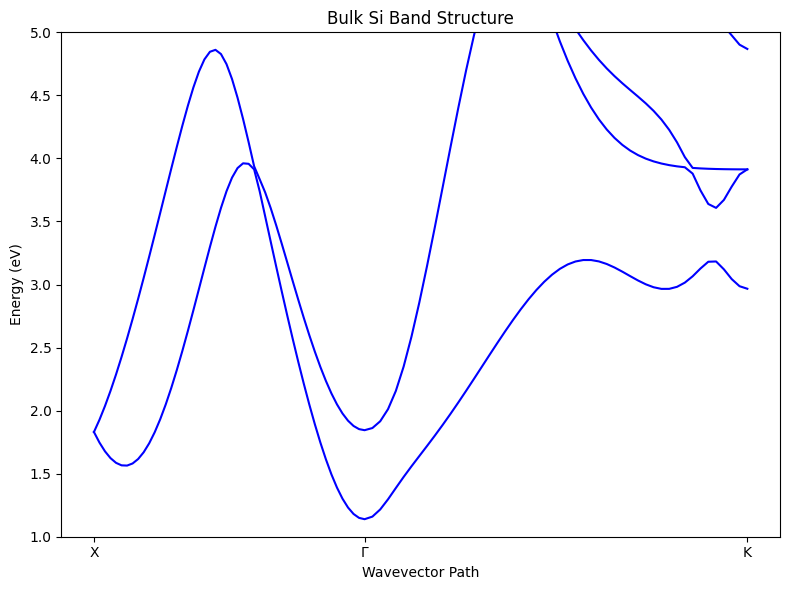

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# ===== High-Symmetry Points =====
# ===== High‑symmetry points (fractional coords of the FCC BZ) =====
G = np.array([0.0 , 0.0 , 0.85 ])
L = np.array([0.5 , 0.5 , 0.5 ])
X = np.array([1.0 , 0.0 , 0.85 ])
U = np.array([0.25, 0.25, 1.0 ])
K = np.array([1, 1, 0.85 ])
# high‑symmetry path
"""hs_points = [
    ('L', L),
    ('Γ', G),
    ('X', X),
    ('U', U),
    ('K', K),
   ('Γ', G),
] """
hs_points = [
    ('X', X),
    ('Γ', G),
    ('K', K)
] 
num_pts = 50
k_points    = []
k_path_dist = []
hs_labels   = []

# initialize
k_points.append(hs_points[0][1])
k_path_dist.append(0.0)
hs_labels.append((hs_points[0][0], 0.0))

# build all segments in one go
for i in range(len(hs_points)-1):
    lbl_s, ks = hs_points[i]
    lbl_e, ke = hs_points[i+1]

    seg = np.linspace(ks, ke, num_pts, endpoint=True)
    for j, kk in enumerate(seg):
        # skip duplicate endpoint of previous segment
        if j == 0:
            continue

        # calculate Δℓ—*unless* this is U→K, in which case force zero
        if lbl_s == 'U' and lbl_e == 'K':
            delta = 0.0000
        else:
            delta = np.linalg.norm(kk - k_points[-1])

        k_points.append(kk)
        k_path_dist.append(k_path_dist[-1] + delta)

    # mark the tick
    hs_labels.append((lbl_e, k_path_dist[-1]))

k_points    = np.array(k_points)
k_path_dist = np.array(k_path_dist)


bands = [] 

for k in k_points:
    
    eigvals,H = create_bulk_tight_binding(k)
   
    bands.append(eigvals)
bands = np.array(bands)   # shape (N_k, N_bands)

# ----- break the U→K vertical jump -----
dℓ = np.diff(k_path_dist)
splice = np.where(dℓ == 0)[0] + 1
bands[splice, :] = np.nan

# ===== plot =====

plt.figure(figsize=(8,6))
for band in range(bands.shape[1]):
    plt.plot(k_path_dist, bands[:,band], 'b-')
    
    
plt.xticks([d for (l,d) in hs_labels],
           [l for (l,d) in hs_labels])
plt.ylim(1,5)
plt.xlabel("Wavevector Path")
plt.ylabel("Energy (eV)")
plt.title("Bulk Si Band Structure")
plt.tight_layout()
plt.show()


In [51]:
import numpy as np
from itertools import product
from multiprocessing import Pool, cpu_count

# create the k grid 
def make_mp_grid(Nk):
    """Return an (Nk3, 3) array of fractional k-vectors (0 … 1) in the 1st BZ."""
    shifts = np.linspace(0, 1, Nk, endpoint=False) + 0.5/Nk   
    klist  = np.array(list(product(shifts, repeat=3)))        

    return klist                                             

def eval_k(k_frac):
    """return the good eigenvalues"""
    eigvals, _ = create_bulk_tight_binding(k_frac)    
    vbm = eigvals[eigvals <=  0.0].max()     
    cbm = eigvals[eigvals >=  0.0].min()
    return vbm, cbm, eigvals

# helper method 
def frac_shift(k_frac, delta):
    return (k_frac + delta) % 1.0

#  effective-mass tensor around the CBM
def find_effective_mass(k_min_frac, Nk_coarse, band_idx,
                        resolution_factor=4, a=5.431e-10):


    delta_frac = 1.0 / (Nk_coarse * resolution_factor)        # we want a finer mesh size
    dk = (2*np.pi / a) * delta_frac                       


    k0 = np.asarray(k_min_frac, float)

    # get the good energy
    def E(k_frac):
        evs, _ = create_bulk_tight_binding(k_frac)
        return evs[band_idx]


    #shift 
    ei = np.eye(3)

    # Hessian 
    H = np.zeros((3,3))
    for i in range(3):
        # second derivative along axis i
        kp = frac_shift(k0,  +delta_frac * ei[i])
        km = frac_shift(k0,  -delta_frac * ei[i])
        H[i,i] = (E(kp) + E(km) - 2*E(k0)) / dk**2

        # mixed derivatives
        for j in range(i+1, 3):
            kpp = frac_shift(k0, +delta_frac*ei[i] + delta_frac*ei[j])
            kmm = frac_shift(k0, -delta_frac*ei[i] - delta_frac*ei[j])
            kpm = frac_shift(k0, +delta_frac*ei[i] - delta_frac*ei[j])
            kmp = frac_shift(k0, -delta_frac*ei[i] + delta_frac*ei[j])
            H[i,j] = H[j,i] = (E(kpp)+E(kmm)-E(kpm)-E(kmp)) / (4*dk**2)

    # convert eV → J
    H_J = H * spc.e

    # m*  = hbar^2 *
    mstar_SI = spc.hbar**2 * np.linalg.inv(H_J)           # kg
    mstar_me = mstar_SI / spc.m_e                         # in m_e

    prin_m, prin_axes = np.linalg.eigh(mstar_me)
    return mstar_me, prin_m, prin_axes


def scan_full_BZ(Nk=20, store_all=True, n_jobs=None, a=5.431e-10,
                 res_factor=4):
    """
    Nk       : number of k-points per reciprocal-lattice axis (Nk³ total)
    store_all: if True, return the entire E(k) array (size Nk³ × Nb)
    n_jobs   : cores to use; default = all available
    """
    klist = make_mp_grid(Nk)
    nbands = len(create_bulk_tight_binding(np.zeros(3))[0])   # quick probe
    
    dk = 1 / Nk
    # ----- parallel diagonalisation -----
    n_jobs = n_jobs or cpu_count()
    with Pool(processes=n_jobs) as pool:
        results = pool.map(eval_k, klist, chunksize=len(klist)//n_jobs)

    # collect extrema
    vbm_E, cbm_E = -np.inf, np.inf
    vbm_data = cbm_data = None
    if store_all:
        all_E = np.empty((len(klist), nbands))
        print(all_E.shape)

    for idx, (v, c, eigs) in enumerate(results):
        if v > vbm_E:
            vbm_E      = v
            vbm_data   = (v, klist[idx], int(np.where(eigs==v)[0][0]))
        if c < cbm_E:
            
            cbm_E      = c
            cbm_data   = (c, klist[idx], int(np.where(eigs==c)[0][0]))
        if store_all:
            all_E[idx] = eigs

    
    
    
    Egap = cbm_E - vbm_E
    print(f"Fundamental gap = {Egap:.4f} eV")
    print("VBM : E = {:.4f} eV  at k_frac = {}".format(*vbm_data[:2]))
    print("CBM : E = {:.4f} eV  at k_frac = {}".format(*cbm_data[:2]))
    print("Direct gap" if np.allclose(vbm_data[1], cbm_data[1]) else "Indirect gap")
    mstar, prin_m, prin_ax = find_effective_mass(cbm_data[1], Nk,
                                                 cbm_data[2],
                                                 resolution_factor=res_factor,
                                                 a=a)
    print("\nEffective-mass tensor at CBM:\n", mstar)
    print("Principal masses in me:\n", prin_m)

    if store_all:
        return (Egap, vbm_data, cbm_data,
                klist, all_E,
                mstar, prin_m, prin_ax)
    return Egap, vbm_data, cbm_data, mstar, prin_m, prin_ax


Egap, vbm, cbm, klist, allE, M, m_prin, axes = \
        scan_full_BZ(Nk=30, store_all=True, res_factor=6)

print("\ndelta-valley:  m_l = {:.3f}  m_t = {:.3f}  (in me)"
      .format(m_prin.max(), m_prin.min()))



(27000, 20)
Fundamental gap = 1.1666 eV
VBM : E = -0.0215 eV  at k_frac = [0.98333333 0.98333333 0.98333333]
CBM : E = 1.1451 eV  at k_frac = [0.81666667 0.01666667 0.01666667]
Indirect gap

Effective-mass tensor at CBM:
 [[0.89034512 0.00539393 0.00539393]
 [0.00539393 0.20736478 0.0085126 ]
 [0.00539393 0.0085126  0.20736478]]
Principal masses in me:
 [0.19885217 0.21579112 0.89043138]

delta-valley:  m_l = 0.890  m_t = 0.199  (in me)


### sp3 dictionary

In [52]:
a    = 5.44e-10   
hbar = spc.constants.hbar 
a    = 5.44e-10                   
_2pi_over_a = 2*np.pi / a
EV_TO_J  = 1.602176634e-19
SK = {
    ('s', 's'): lambda l, m, n, V: V['ss'],
    ('s', 'px'): lambda l, m, n, V:  l * V['sp'],
    ('px', 's'): lambda l, m, n, V: -l * V['sp'],

    ('s', 'py'): lambda l, m, n, V:  m * V['sp'],
    ('py', 's'): lambda l, m, n, V: -m * V['sp'],

    ('s', 'pz'): lambda l, m, n, V:  n * V['sp'],
    ('pz', 's'): lambda l, m, n, V: -n * V['sp'],

    ('px', 'px'): lambda l, m, n, V: l**2 * V['pp_sigma'] + (1 - l**2) * V['pp_pi'],
    ('py', 'py'): lambda l, m, n, V: m**2 * V['pp_sigma'] + (1 - m**2) * V['pp_pi'],
    ('pz', 'pz'): lambda l, m, n, V: n**2 * V['pp_sigma'] + (1 - n**2) * V['pp_pi'],

    ('px', 'py'): lambda l, m, n, V: l * m * (V['pp_sigma'] - V['pp_pi']),
    ('px', 'pz'): lambda l, m, n, V: l * n * (V['pp_sigma'] - V['pp_pi']),
    ('py', 'pz'): lambda l, m, n, V: m * n * (V['pp_sigma'] - V['pp_pi']),

    ('py', 'px'): lambda l, m, n, V: l * m * (V['pp_sigma'] - V['pp_pi']),
    ('pz', 'px'): lambda l, m, n, V: l * n * (V['pp_sigma'] - V['pp_pi']),
    ('pz', 'py'): lambda l, m, n, V: m * n * (V['pp_sigma'] - V['pp_pi']),
}


V_ss_sigma = -1.95933#Vss / 4
V_sp_sigma = 3.02562 #np.sqrt(3) / 4 * Vsp
V_pp_pi = -1.51801#diff1 / 4
V_pp_sigma = 4.10364#(Vxy + 4 * V_pp_pi /3) * 3 / 4
a = 1   

Es,Ep =  -2.15168, 4.22925
E = {'s': Es, 'px': Ep, 'py': Ep, 'pz': Ep}
V = {
    'ss': V_ss_sigma,
    'sp': V_sp_sigma,
    'pp_sigma': V_pp_sigma,
    'pp_pi': V_pp_pi
}

distance = np.sqrt(3)/4
base_angle = np.sqrt(1/3)
unitCellDict = {
    (0.0, 0.0, 0.0): [ 
        {"neighbor_position": (0.25, 0.25, 0.25), 
         "delta": (0.25, 0.25, 0.25),
         "distance": distance,
         "l":  base_angle, "m":  base_angle, "n":  base_angle},
        {"neighbor_position": (0.25, -0.25, -0.25), 
         "delta": (0.25, -0.25, -0.25),
         "distance": distance,
         "l":  base_angle, "m": -base_angle, "n": -base_angle},
        {"neighbor_position": (-0.25, 0.25, -0.25), 
         "delta": (-0.25, 0.25, -0.25),
         "distance": distance,
         "l": -base_angle, "m":  base_angle, "n": -base_angle},
        {"neighbor_position": (-0.25, -0.25, 0.25), 
         "delta": (-0.25, -0.25, 0.25),
         "distance": distance,
         "l": -base_angle, "m": -base_angle, "n":  base_angle},
    ],
    (0.25, 0.25, 0.25): [
        {"neighbor_position": (0.0, 0.0, 0.0), 
         "delta": (-0.25, -0.25, -0.25),
         "distance": distance,
         "l": -base_angle, "m": -base_angle, "n": -base_angle},
        {"neighbor_position": (0.0, 0.5, 0.5), 
         "delta": (-0.25, 0.25, 0.25),
         "distance": distance,
         "l": -base_angle, "m":  base_angle, "n":  base_angle},
        {"neighbor_position": (0.5, 0.0, 0.5), 
         "delta": (0.25, -0.25, 0.25),
         "distance": distance,
         "l":  base_angle, "m": -base_angle, "n":  base_angle},
        {"neighbor_position": (0.5, 0.5, 0.0), 
         "delta": (0.25, 0.25, -0.25),
         "distance": distance,
         "l":  base_angle, "m":  base_angle, "n": -base_angle},
    ]
}

/tmp/ipykernel_559199/450508989.py:2: DeprecationWarning: Please import `hbar` from the `scipy.constants` namespace; the `scipy.constants.constants` namespace is deprecated and will be removed in SciPy 2.0.0.
  hbar = spc.constants.hbar
